# Amittai W

## Computational Comparative Literature

### Imports

In [1]:
import warnings

# ignore bugging deprecation warnings.
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=DeprecationWarning)
  import matplotlib.pyplot as plt
  import numpy as np
  import pandas as pd
  from sklearn.feature_extraction.text import TfidfVectorizer
  import pandas as pd
  from pandas import DataFrame
  pd.set_option('display.max_rows', 600)
  from pathlib import Path  
  import glob
  from os import path
  import numpy.random as random
  from IPython.display import display, HTML
  import pyLDAvis
  from wordcloud import WordCloud
  # %pip install gensim
  import gensim.corpora as corpora
  import gensim
  from gensim.utils import simple_preprocess  
  import tensorflow as tf
  from typing import List, Tuple, Set


/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/h5py/__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


In [2]:
# stop words

class Colors:
  HEADER = '\033[95m'
  OKBLUE = '\033[94m'
  OKCYAN = '\033[96m'
  OKGREEN = '\033[92m'
  WARNING = '\033[93m'
  FAIL = '\033[91m'
  ENDC = '\033[0m'
  BOLD = '\033[1m'
  UNDERLINE = '\033[4m'

def load_stopwords():
  stopwords = []
  with open("../data/metadata/stopwords.txt") as f:
    for line in f:
      # print(line)
      stopwords.append(line.strip()) # .append(line.strip())
  return stopwords

stop_words = load_stopwords()

print(Colors.OKBLUE + "Hello, welcome to my project!" + Colors.ENDC)
print(f"{stop_words = }")

Hello, welcome to my project!
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'cert

In [3]:
# years to focus on
years = [str(yr) for yr in range(2000, 2023)]

# max count per year
max_count = 10

print(f"Using year range {years[0]} to {years[-1]}") # , max_count

Using year range 2000 to 2022


1.

In [4]:
# load $count files for each year.
directory_path = "../data/categorized"

def load_dictionary():
  # all_words = []
  dictionary = set()
  dictionary_file = "../data/metadata/dictionary"
  with open(dictionary_file) as f:
    for line in f:
      dictionary.add(line.strip().lower())
  return dictionary

def load_counts():
  with open("../data/metadata/counts.csv", "r") as counts_file:
    counts = pd.read_csv(counts_file)
  return counts

def load_words() -> List[List[str]]:
  """Load data (words) into a list of lists of words."""
  dictionary = load_dictionary()
  stop_words = load_stopwords()
  all_words = []
  for year in years:
    possible_files = [f for f in glob.glob(f"{directory_path}/{year}/*.txt") if path.exists(f)]
    num_files = min(max_count, len(possible_files))
    files = random.choice(possible_files, size=num_files, replace=True)
    words = []
    for file in files:
      with open(file) as f:
        for line in f:
          for word in line.strip().lower().split():
            if word in dictionary and word not in stop_words + ["old", "id"]:
              words.append(word)
    # pd = DataFrame([year, words], columns=["year", "words"])
    all_words.append(words)
  return all_words

all_words = load_words()
def load_words_str():
  """Load data (words) into a list of strings."""
  global all_words
  if "all_words" not in globals():
    all_words = load_words()
  return [" ".join(w) for w in all_words]

def load_data():
  """Load data (words0 into a dataframe)"""
  all_words = load_words_str()
  df = pd.DataFrame(all_words, columns = ["words"])
  df.insert(0, "year", years, allow_duplicates=False)
  return df

raw_data = load_data()
raw_data.head(100)


,year,words
0,2000,project muse art odyssey journal classical ass...
1,2001,combat halo alpha fandom combat combat combat ...
2,2002,tackling violence south learn tackling violenc...
3,2003,generation nuclear power scientific american s...
4,2004,meditation leads reduced default mode network ...
5,2005,data wired visit saved visit saved data visit ...
6,2006,future future offer experience noticeably bett...
7,2007,consciousness brain region consciousness brain...
8,2008,design article legacy limited official united ...
9,2009,starcraft ai competition history starcraft ai ...


In [5]:
# load stopwords
stop_words = load_stopwords()
print(f"First 10 stopwords: {stop_words[0:10]}")

First 10 stopwords: ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act']


In [6]:
# initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(input='content', stop_words=load_stopwords(), strip_accents="ascii")
tfidf_vector = tfidf_vectorizer.fit_transform(raw_data["words"])


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=[str(year) for year in years], columns=tfidf_vectorizer.get_feature_names_out())
# data.append(tfidf_df)
data = tfidf_df
data.loc["document"] = data.sum(axis=0)

/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['didn', 'doesn', 'don', 'hasn', 'haven', 'isn', 'keep', 'keeps', 'll', 'shouldn', 'sure', 've'] not in stop_words.
  warnings.warn(


In [7]:
# Re-organize so words are in rows rather than columns
cleaned_data = data.sort_index().stack().reset_index()
cleaned_data = cleaned_data.rename(columns={0:'tfidf', 'level_0': 'year','level_1': 'term', 'level_2': 'term'})
# stacked_tfidf_df.sample(n=20)
print(f"Random sample of words and years from cleaned_data:")
cleaned_data.sample(n=20)

Random sample of words and years from cleaned_data:


,year,term,tfidf
181378,2012,abraham,0.000000
30214,2001,zodiac,0.000000
155723,2010,erica,0.000000
28889,2001,trailer,0.015564
9184,2000,omniscient,0.000000
83932,2005,microbiology,0.000000
107573,2007,caloric,0.000000
342918,2022,properly,0.002536
153900,2010,construct,0.008141
245711,2016,distracted,0.000000


In [8]:
# top 10 words for all stories
#! MemoryError: Unable to allocate 97.5 GiB for an array with shape (23351, 560214) and data type float64
top_tfidf = cleaned_data.groupby(['year', 'term'])['tfidf'].sum().sort_values(ascending=False).groupby('year')
DataFrame(top_tfidf.head(1000))

tfidf
year     term                
document data        2.060642
         protein     1.327810
         people      1.278039
         human       1.276517
         meditation  1.152884
...                       ...
2002     drug        0.003038
         air         0.003038
         efficient   0.003038
         vision      0.003038
         driven      0.003038

[24000 rows x 1 columns]

In [9]:
# view the top words by year.

for year, data in top_tfidf:
  print(data.head(20))
  print("\n")


year  term       
2000  everett        0.414996
      cognitive      0.268401
      task           0.236317
      protein        0.230641
      casino         0.182444
      network        0.153937
      recruitment    0.144352
      amino          0.137017
      ino            0.131584
      brain          0.123462
      functional     0.121552
      integration    0.116341
      system         0.112549
      null           0.111907
      indoor         0.111836
      dynamic        0.110331
      polypeptide    0.102858
      cartography    0.101218
      structure      0.091559
      pete           0.089442
Name: tfidf, dtype: float64


year  term         
2001  chromatin        0.672919
      chromosome       0.347667
      nuclear          0.307991
      cell             0.199489
      gene             0.153351
      interphase       0.148452
      human            0.105686
      covenant         0.103467
      nucleus          0.101169
      phantom          0.088490
      transc

2.

In [10]:
# check for a single word
def check_word(df, word, count):
  """Check the occurrence of a word in a dataframe."""
  return df[df['term'] == word].sort_values("tfidf", ascending=False).head(count)


In [11]:
check_word(cleaned_data, "ethics", 20)

,year,term,tfidf
352230,document,ethics,0.121100
155774,2010,ethics,0.023772
276670,2018,ethics,0.020797
261558,2017,ethics,0.017645
291782,2019,ethics,0.017307
246446,2016,ethics,0.008282
201110,2013,ethics,0.006580
322006,2021,ethics,0.005799
95326,2006,ethics,0.005025
337118,2022,ethics,0.004610


In [12]:
check_word(cleaned_data, "death", 20)

,year,term,tfidf
350899,document,death,0.137892
230003,2015,death,0.022460
305563,2020,death,0.020930
109107,2007,death,0.019508
139331,2009,death,0.013862
214891,2014,death,0.012030
199779,2013,death,0.010349
169555,2011,death,0.010299
63771,2004,death,0.007786
48659,2003,death,0.004975


## Latent Dirichlet Allocation (LDA)

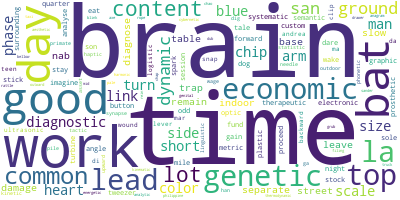

,year,term,tfidf
350869,document,data,2.060642
358068,document,protein,1.327810
357257,document,people,1.278039
353992,document,human,1.276517
355819,document,meditation,1.152884
...,...,...,...
351410,document,dismissal,0.001870
351411,document,dismissive,0.001870
354858,document,jeremiad,0.001870
361503,document,trod,0.001870


In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

sorted_words = cleaned_data[cleaned_data["year"] == "document"].sort_values("tfidf", ascending=False)
words = ",".join(sorted_words["term"].values)
# Generate a word cloud
wordcloud.generate(words)
# Visualize the word cloud
display(wordcloud.to_image())
sorted_words

In [14]:
import gensim.corpora as corpora

# ! re-use 'all_words' variable defined earlier.
# all_words = load_words()

id2word = corpora.Dictionary(all_words)

# Term Document Frequency
corpus = [id2word.doc2bow(year_data) for year_data in all_words]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 6), (3, 8), (4, 3), (5, 12), (6, 2), (7, 2), (8, 2), (9, 4), (10, 2), (11, 11), (12, 1), (13, 3), (14, 2), (15, 1), (16, 2), (17, 6), (18, 1), (19, 8), (20, 4), (21, 1), (22, 30), (23, 2), (24, 4), (25, 2), (26, 13), (27, 7), (28, 10), (29, 2)]


In [15]:
from pprint import pprint
# number of topics
print(corpus[:1][0][:30])
num_topics = 10
# Build LDA model
def build_lda():
  """Build LDA model."""
  lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, chunksize=100, passes=2, workers=8)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  print(f"doc_lda: {doc_lda}")
  return lda_model

[(0, 2), (1, 1), (2, 6), (3, 8), (4, 3), (5, 12), (6, 2), (7, 2), (8, 2), (9, 4), (10, 2), (11, 11), (12, 1), (13, 3), (14, 2), (15, 1), (16, 2), (17, 6), (18, 1), (19, 8), (20, 4), (21, 1), (22, 30), (23, 2), (24, 4), (25, 2), (26, 13), (27, 7), (28, 10), (29, 2)]


In [16]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
LDAvis_data_filepath = f"ldavis_prepared_{str(num_topics)}"
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

rebuild = False  # change this to rebuild the visualization
if rebuild:
    lda_model = build_lda()
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)


# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f"{LDAvis_data_filepath}.html")
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.085295  0.029523       1        1  18.485250
8      0.005984 -0.006521       2        1  16.833333
3      0.035231 -0.000811       3        1  14.090103
9     -0.043232 -0.015866       4        1  13.673286
6     -0.055312  0.068322       5        1  10.866340
2     -0.010856 -0.018850       6        1  10.480155
7     -0.025391 -0.021201       7        1   7.696589
4      0.003823 -0.040823       8        1   4.983785
1      0.010029  0.005783       9        1   2.879483
0     -0.005570  0.000444      10        1   0.011675, topic_info=            Term         Freq        Total Category  logprob  loglift
692         data  1666.000000  1666.000000  Default  30.0000  30.0000
1605    learning   872.000000   872.000000  Default  29.0000  29.0000
3794     nuclear   312.000000   312.000000  Default  28.0000  28.0000
634       course   255.000000   255.000000  Default  27.0000  27.0000
3243   chromatin   254.000000   254.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2812        time     0.061865   685.227814  Topic10  -6.1602  -0.2571
2137     protein     0.058772   559.788446  Topic10  -6.2115  -0.1062
1219      future     0.054541   461.729359  Topic10  -6.2862   0.0117
2798       three     0.054018   460.009956  Topic10  -6.2958   0.0058
2924  university     0.053544   462.107957  Topic10  -6.3046  -0.0076

[794 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7581      1  0.077739      abe
7581      2  0.621914      abe
7581      3  0.155479      abe
7581      7  0.155479      abe
9302      1  0.052279  abelian
...     ...       ...      ...
3071      7  0.116817  written
3071      8  0.035944  written
3071      9  0.026958  written
3081      2  0.114869     zeus
3081      4  0.689214     zeus

[3787 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 4, 10, 7, 3, 8, 5, 2, 1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9aea91d7-4b5b-4bfd-9aea-233a34d76dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

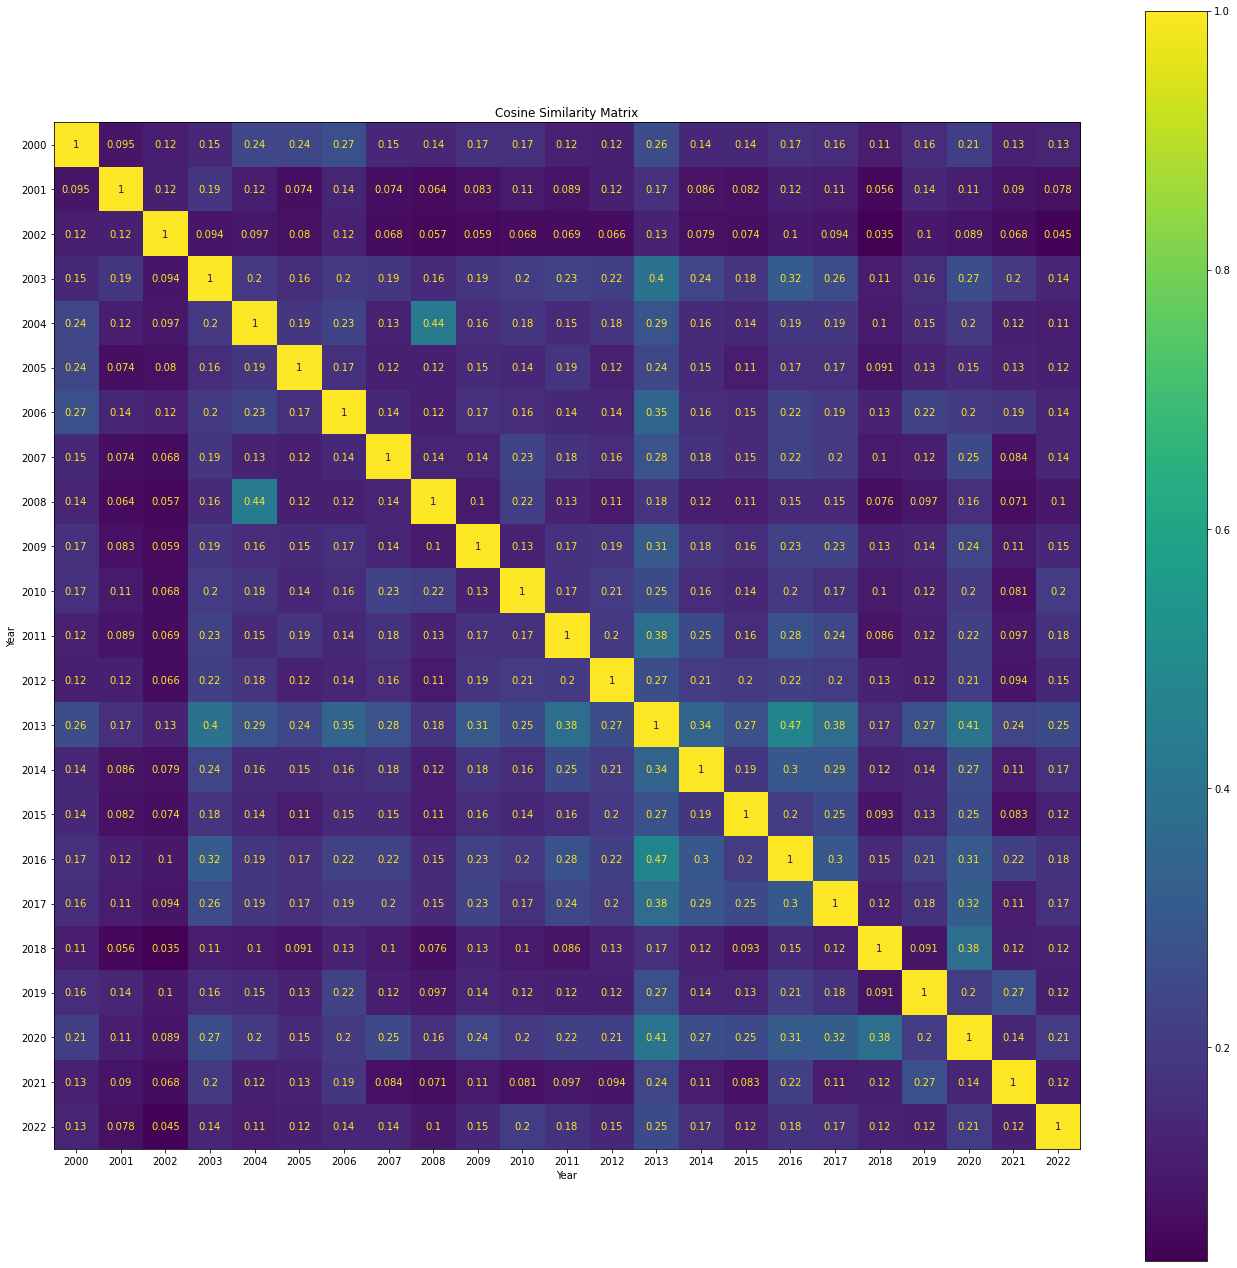

In [17]:
# Visualize Cosine Similarities
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import ConfusionMatrixDisplay

years_df = tfidf_df.drop(labels=["document"])
years = list(range(2000, 2023))
size=len(years)

cosine_sim = linear_kernel(years_df, years_df)
plot = ConfusionMatrixDisplay(cosine_sim, display_labels=years)
fig, ax = plt.subplots(figsize=(size, size))
ax.set (
  xticks=np.arange(size),
  yticks=np.arange(size),
  xticklabels=years,
  yticklabels=years,
  title="Cosine Similarity Matrix",
  xlabel="Year",
  ylabel="Year"
)
plot.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Year")
plt.show()

# Let's do Predictive Analysis!

In [18]:
# let's summon back our raw text!
raw_text = all_words

vocab = { word for word_list in raw_text for word in word_list }
    
vocab = sorted(vocab)
print(f"Loaded vocabulary of {len(vocab)} unique words.")

Loaded vocabulary of 15113 unique words.


In [43]:
# Utility functions to convert text to TF ids and back

class Parser():
  def __init__(self, vocab):
    self.vocab = vocab
    self.word2id = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None, invert=True)
    self.id2word = tf.keras.layers.StringLookup(vocabulary=self.word2id.get_vocabulary(), invert=True, mask_token=None)
    
  def parse(self, word):
    return self.word2id(word)

  def reverse(self, ids):
    return self.id2word(ids)

def text_from_ids(ids):
  tf.keras.layers.StringLookup(vocabulary=ids.get_vocabulary(), invert=True, mask_token=None)

# test
parser = Parser(vocab)
print(parser.parse("a"))
print(parser.reverse(23))

TypeError: Exception encountered when calling layer "string_lookup_31" (type StringLookup).

Cannot convert 'a' to EagerTensor of dtype int64

Call arguments received:
  • inputs='a'

In [26]:
# vectorize the text for tensorflow.

tf.strings.unicode_split("hello ", input_encoding="UTF-8")


ids = ids_from_text(vocab)
ids

In [ ]:
# create string lookup layer